# Exame - FST - CTC-34

## Exemplos

In [1]:
from FST import FST as FST
from FST_Otimizado import FST_Otimizado as FST_Otimizado

In [2]:
palavras_de_teste = ['mon', 'thurs', 'tues','tye', 'zon']

palavras_de_teste1 = ["A's", "AA's", 'Actaeon', 'Acton', 'Acts', 'Acuff']

palavras_de_teste2 = ['apr', 'aug', 'mar', 'may']

palavras_de_teste3 = ['aab111','aab222','aab333','ab111', 'ab222', 'ab333']

palavras_de_teste4 = ['a', 'aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaa', 'aaaaaaaa', 'aaaaaaaaa', 'aaaaaaaaaa', 'b', 'ba']

In [3]:
fst = FST(words=palavras_de_teste2)

In [4]:
fst.imprimir()
fst.imprimir_inverso()

from graphviz import render

arquivo = 'fst.dot'
arquivo2 = 'fst_inverso.dot'

render('dot', 'png', arquivo)
render('dot', 'png', arquivo2)

Número de nós: 7


'fst_inverso.dot.png'

## Completo

#### Palavras

In [5]:
data = open('words.txt', 'r')
words = []
for line in data:
    line = line.strip()
    if len(line) == 1:
        continue
    
    words.append(line)

print("Numero de palavras: ", len(words))

Numero de palavras:  99119


#### Build

In [6]:
fst_otimizado = FST_Otimizado(words=words)

#### Funções de Busca

In [24]:
def matches_fst(word):
    resp = fst_otimizado.checar_combinacoes(word)
    #print("Total de palavras encontradas: " + str(len(resp)) + "\n")
    return resp

In [25]:
def matches_bs(word):
    num_words = len(words)
    matches = []
    cont = 0
    ini = 0
    fim = num_words - 1
    atual = 0
    
    while ini <= fim:
        atual = (ini + fim) // 2
        if (words[atual].startswith(word)):
            fim = -1
        elif (words[atual] > word):
            fim = atual - 1
        else:
            ini = atual + 1
    
    while words[atual-1].startswith(word):
        atual -= 1

    while words[atual].startswith(word) and atual < len(words)-1:
        matches.append(words[atual])
        cont += 1
        atual += 1

    if atual == len(words)-1:
        if words[atual].startswith(word):
            matches.append(words[atual])
            cont += 1

    #print("Total de palavras encontradas: " + str(len(matches)) + "\n")
    return matches

#### Comprovação de Corretude

In [26]:
match1 = matches_fst("")

print("Palavras encontradas pelo método FST: ", len(match1))
print("Palavras do dicionario: ", len(words))

# for m in match1:
#     if m not in match2:
#         print("Erro: " + m + " não não foi encontrado pelo método FST")

# for m in words:
#     if m not in match1:
#         print("Erro: " + m + " não está na lista de palavras encontradas pelo método FST")

Palavras encontradas pelo método FST:  99119
Palavras do dicionario:  99119


In [43]:
prefixos = set()
for w in words:
    for i in range(1, len(w)):
        prefixos.add(w[:i])

print("Total de prefixos: ", len(prefixos))

Total de prefixos:  160400


In [44]:
for p in prefixos:
    match1 = matches_fst(p)
    match2 = matches_bs(p)
    if len(match1) != len(match2):
        print("Erro: " + p + " não foi encontrado pelo método FST")

#### Comparativos de Tempo

In [33]:
import timeit

temps_fst = []
temps_bs = []
lens = []
for p in prefixos:
    temp1 = timeit.timeit("matches_fst(p)", number=1, globals=globals())
    temp2 = timeit.timeit("matches_bs(p)", number=1, globals=globals())
    temps_fst.append(temp1)
    temps_bs.append(temp2)   
    lens.append(len(p)) 

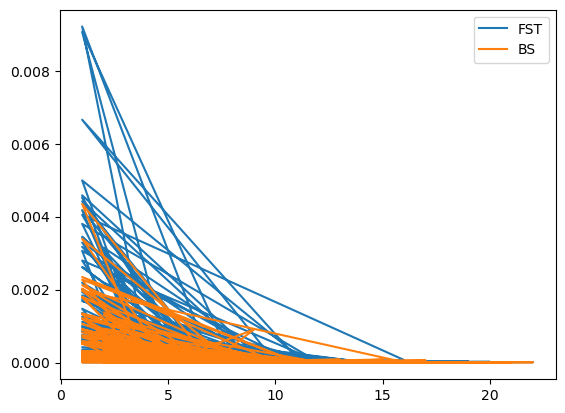

In [34]:
import matplotlib.pyplot as plt

plt.plot(lens, temps_fst, label="FST")
plt.plot(lens, temps_bs, label="BS")
plt.legend()
plt.show()

In [35]:
print("Tempo Médio FST: ", sum(temps_fst)/len(temps_fst))

Tempo Médio FST:  1.288168770430216e-05


In [36]:
print("Tempo Médio BS: ", sum(temps_bs)/len(temps_bs))

Tempo Médio BS:  1.0361435779849673e-05


#### Comparativos de Espaço

In [20]:
import sys
print(sys.getsizeof(fst_otimizado))

48


In [22]:
print(len(matches_fst("a")))

4666


In [23]:
print(len(matches_bs("a")))

4666


## Le...

## AutoComplete

In [40]:
def matches_fst(word):
    resp = fst_otimizado.checar_combinacoes(word)
    resp.sort()
    #print("Total de palavras encontradas: " + str(len(resp)) + "\n")
    return resp[:5]

In [41]:
def matches_bs(word):
    num_words = len(words)
    matches = []
    cont = 0
    ini = 0
    fim = num_words - 1
    atual = 0
    
    while ini <= fim:
        atual = (ini + fim) // 2
        if (words[atual].startswith(word)):
            fim = -1
        elif (words[atual] > word):
            fim = atual - 1
        else:
            ini = atual + 1
    
    while words[atual-1].startswith(word):
        atual -= 1

    while words[atual].startswith(word) and atual < len(words)-1:
        matches.append(words[atual])
        cont += 1
        atual += 1

    if atual == len(words)-1:
        if words[atual].startswith(word):
            matches.append(words[atual])
            cont += 1

    #print("Total de palavras encontradas: " + str(len(matches)) + "\n")
    return matches[:5]

In [42]:
import tkinter as tk
import timeit

class AutocompleteText(tk.Text):
    def __init__(self, *args, **kwargs):
        self.callback = kwargs.pop("autocomplete", None)
        self.comparativo1 = kwargs.pop("comparativo1", None)
        super().__init__(*args, **kwargs)
        self.bind("<Any-KeyRelease>", self._autocomplete)
        self.bind("<Tab>", self._handle_tab)

    def _handle_tab(self, event):
        tag_ranges= self.tag_ranges("autocomplete")
        if tag_ranges:
            self.mark_set("insert", tag_ranges[1])
            self.tag_remove("sel", "1.0", "end")
            self.tag_remove("autocomplete", "1.0", "end")

            return "break"

    def _autocomplete(self, event):
        if event.char and self.callback:
            word = self.get("insert-1c wordstart", "insert-1c wordend")
            inicio = timeit.default_timer()
            matches = self.callback(word)
            fim = timeit.default_timer()

            inicio2 = timeit.default_timer()
            matches2 = self.comparativo1(word)
            fim2 = timeit.default_timer()

            text_tempo1["text"] = "Tempo de atualização FST: " + str(round((fim - inicio)*1000,3)) + " ms"

            text_tempo2["text"] = "Tempo de atualização BS: " + str(round((fim2 - inicio2)*1000,3)) + " ms"

            if matches:
                remainder = matches[0][len(word):]
                insert = self.index("insert")
                self.insert(insert, remainder, ("sel", "autocomplete"))
                self.mark_set("insert", insert)
            
            texto = "Outras Sugestões: \n"
            for match in matches[1:]:
                texto += match + "\n"
            texto_outras_opcoes["text"] = texto
            

root = tk.Tk()

# titulo
root.title("Autocomplete")

# tamanho da janela
root.geometry("300x650")

# Label
label = tk.Label(root, text="Digite uma palavra: ")
label.pack(padx=10, pady=10)

# texto
text = AutocompleteText(root, autocomplete=matches_fst, comparativo1 = matches_bs)
text.pack(padx=10, pady=10)

# Outras opções
texto_outras_opcoes = tk.Label(root, text="Outras opções: ")
texto_outras_opcoes.pack(padx=10, pady=10)

# tempo de atualização
text_tempo1 = tk.Label(root, text="Tempo de atualização FST: ")
text_tempo1.pack(padx=10, pady=5)

# tempo de atualização
text_tempo2 = tk.Label(root, text="Tempo de atualização BS: ")
text_tempo2.pack(padx=10, pady=5)

root.mainloop()